In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

11/16/2018 15:40:37 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
11/16/2018 15:40:39 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
11/16/2018 15:40:40 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)


In [6]:
dtfa.normalize_activations()

[tensor(10.8725), tensor(9.7904), tensor(8.5388)]

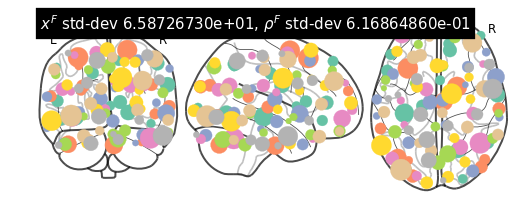

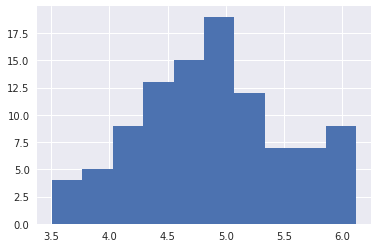

(<nilearn.plotting.displays.OrthoProjector at 0x7f0cd0422a90>,
 tensor([[-54.3097, -56.7950,  45.0092],
         [  2.0425,   8.8216,   4.1264],
         [-35.4598, -25.8203,  -6.9221],
         [ 20.7419, -64.9736,  -3.1276],
         [ 51.7021, -56.2090,  48.5371],
         [-53.4901,  18.7562,   9.0821],
         [ 44.8808,  55.9206, -14.6902],
         [-49.7228,  35.9656, -10.8949],
         [ 25.8882, -94.9240,   2.6774],
         [ 62.3226,  -6.4421,  26.1379],
         [-16.5614, -18.1932,  38.4782],
         [ 12.4052,  40.4115,   7.9127],
         [ 11.0620,  47.2438,  51.4488],
         [  5.9116, -13.6404, -37.3678],
         [ 19.8880,   1.9456,  62.6616],
         [-42.2828, -72.4664, -36.5445],
         [ 64.0481, -21.2029,   3.2640],
         [-31.0834, -75.5805,  46.0164],
         [-28.6227,  63.2095,  20.0919],
         [ 45.4183, -82.3534,  26.1503],
         [-60.4954, -41.9354,  14.0119],
         [-26.7739, -92.0003,  24.6450],
         [ 34.8942, -25.6737, -34.3

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.average_reconstruction_error()

11/16/2018 15:43:05 Average reconstruction error (MSE): 1.12388628e+00
11/16/2018 15:43:05 Average data norm (Euclidean): 9.92958209e-01
11/16/2018 15:43:05 Percent average reconstruction error: 0.382814


(1.1238862789876651, 0.992958209255918, 0.003828138506752428)

In [9]:
losses = dtfa.train(num_steps=5000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=8, patience=500)

11/16/2018 15:43:06 [Epoch 1] (1039ms) Posterior free-energy 1.44336768e+08 = KL from prior 1.96610388e+03 - log-likelihood -1.44334800e+08
11/16/2018 15:43:07 [Epoch 2] (1247ms) Posterior free-energy 1.44719440e+08 = KL from prior 4.60427734e+03 - log-likelihood -1.44714832e+08
11/16/2018 15:43:08 [Epoch 3] (1068ms) Posterior free-energy 1.39746208e+08 = KL from prior 5.28022705e+03 - log-likelihood -1.39740928e+08
11/16/2018 15:43:09 [Epoch 4] (952ms) Posterior free-energy 1.43625760e+08 = KL from prior 7.01480127e+03 - log-likelihood -1.43618752e+08
11/16/2018 15:43:10 [Epoch 5] (962ms) Posterior free-energy 1.42382176e+08 = KL from prior 7.49927344e+03 - log-likelihood -1.42374672e+08
11/16/2018 15:43:11 [Epoch 6] (917ms) Posterior free-energy 1.40996128e+08 = KL from prior 5.72097021e+03 - log-likelihood -1.40990400e+08
11/16/2018 15:43:12 [Epoch 7] (919ms) Posterior free-energy 1.41015664e+08 = KL from prior 1.32891777e+04 - log-likelihood -1.41002368e+08
11/16/2018 15:43:13 [Epo

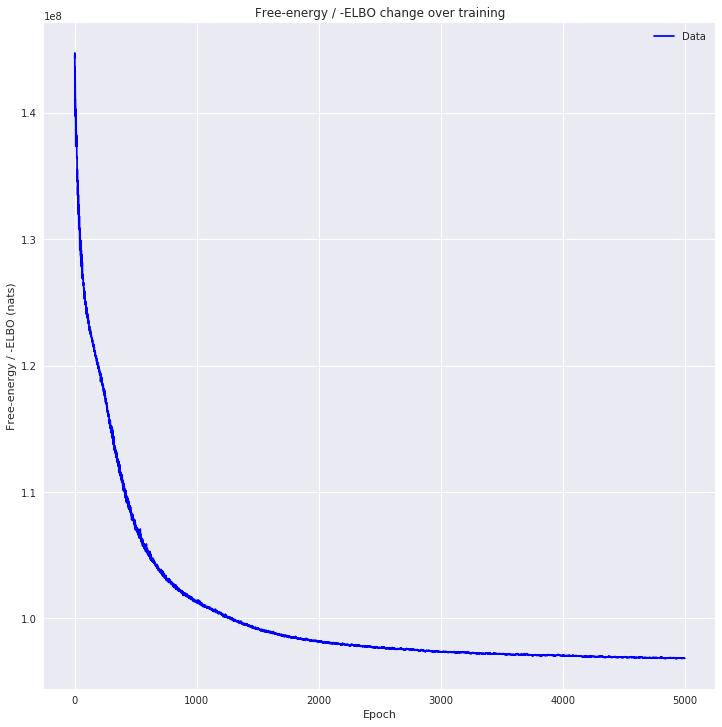

In [10]:
utils.plot_losses(losses)

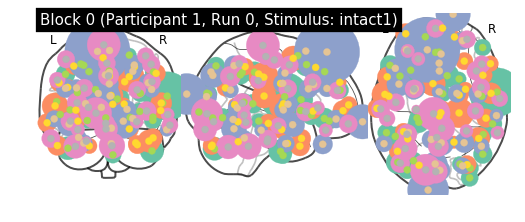

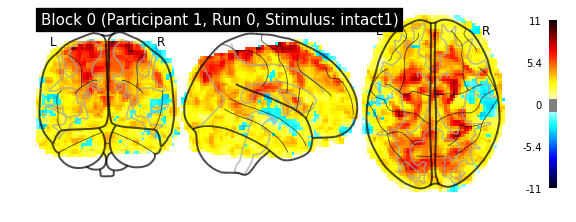

11/16/2018 16:59:13 Reconstruction Error (Frobenius Norm): 4.10156885e+03 out of 5.08479883e+03


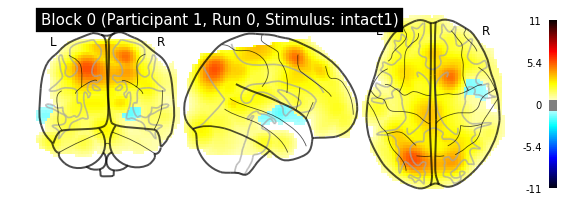

11/16/2018 16:59:27 Reconstruction Error (Frobenius Norm): 4.10156104e+03 out of 5.08479883e+03


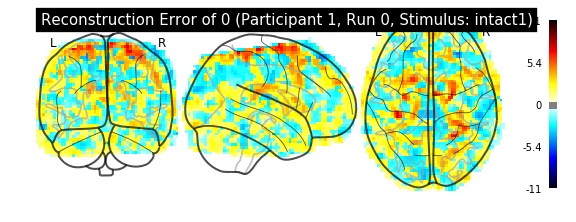

{'weights': tensor([[ 1.4453e+00,  3.0418e+00,  1.9515e-01,  ...,  1.2925e+00,
         -1.0409e+00,  2.4452e+00],
        [ 1.1901e+00,  1.0831e+00, -1.4217e+00,  ...,  5.9670e-01,
         -2.1481e+00,  1.6786e+00],
        [ 1.8271e+00,  5.5938e-01, -4.4079e-01,  ..., -4.9069e-02,
         -2.3046e+00,  1.1187e+00],
        ...,
        [-8.2925e-01, -5.5490e-01,  1.2231e-01,  ...,  5.7456e-01,
          9.0851e-02,  7.7637e-01],
        [-4.5249e-02, -8.9091e-01, -5.6164e-01,  ...,  5.7120e-01,
          1.8805e+00,  4.5941e-01],
        [ 2.9443e-01, -1.3649e+00,  1.6796e-01,  ...,  1.6925e+00,
          4.3865e+00, -9.3406e-01]]), 'factors': tensor([[ 0.0002,  0.0001,  0.0001,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

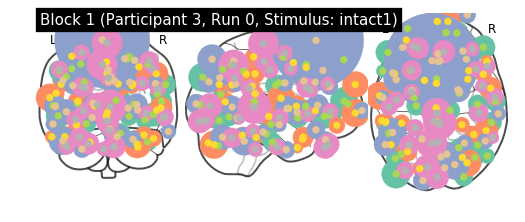

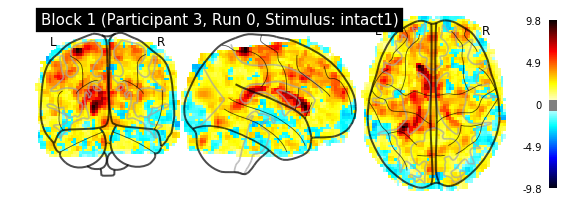

11/16/2018 16:59:58 Reconstruction Error (Frobenius Norm): 4.26884082e+03 out of 5.19534326e+03


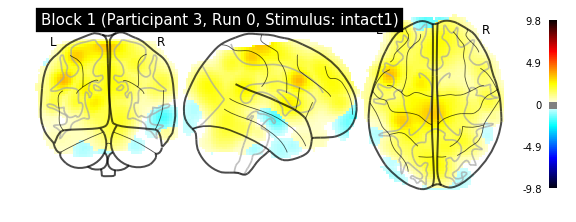

11/16/2018 17:00:11 Reconstruction Error (Frobenius Norm): 4.26818311e+03 out of 5.19534326e+03


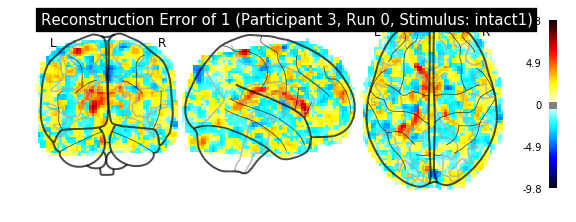

{'weights': tensor([[-1.5867e+00, -1.7166e+00, -1.1018e-01,  ...,  1.1580e+00,
          1.7806e+00, -1.1338e+00],
        [-2.7014e+00, -1.5046e+00, -2.1005e-01,  ..., -7.6871e-01,
          3.1575e-01,  1.9919e-01],
        [-1.3622e+00,  4.8904e-01, -4.5346e-01,  ..., -4.1855e-01,
          7.0228e-01,  1.2227e+00],
        ...,
        [ 1.7909e+00,  7.6469e-02,  3.2101e-01,  ...,  2.7872e-01,
          3.9729e+00, -2.1183e+00],
        [ 1.8505e+00, -5.1841e-01, -3.8885e-02,  ..., -6.6224e-01,
          4.1895e+00, -2.4773e+00],
        [ 1.3923e+00,  1.6996e+00, -9.2019e-01,  ..., -9.1318e-01,
          4.3839e+00, -2.0887e+00]]), 'factors': tensor([[ 0.0027,  0.0012,  0.0015,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

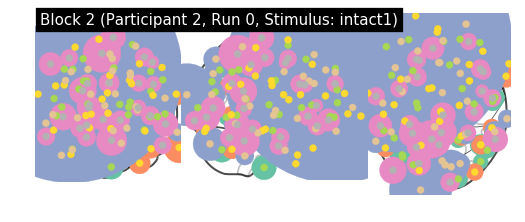

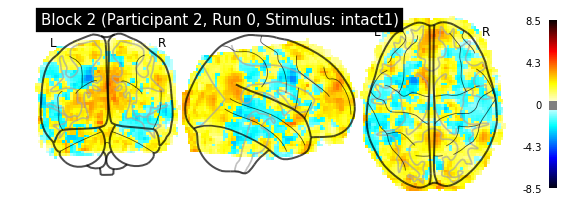

11/16/2018 17:00:42 Reconstruction Error (Frobenius Norm): 3.98734521e+03 out of 5.19534229e+03


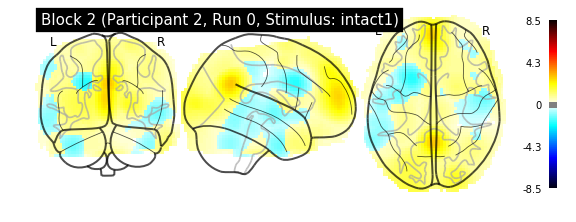

11/16/2018 17:00:57 Reconstruction Error (Frobenius Norm): 3.98617017e+03 out of 5.19534229e+03


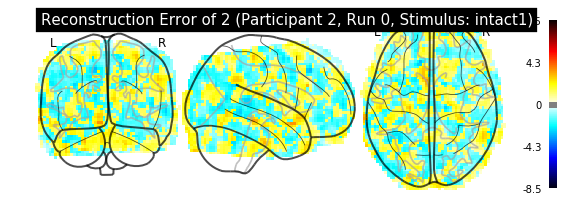

{'weights': tensor([[ 4.7535e-01, -2.8542e-01, -4.8848e-01,  ..., -2.1150e-01,
          1.2550e+00, -2.4692e+00],
        [-1.0446e+00, -2.9440e-01, -8.6481e-01,  ..., -1.2724e+00,
          2.8748e-01, -6.6810e-01],
        [-1.3826e+00,  1.6998e-01,  4.0250e-01,  ..., -3.9398e-01,
          2.8524e-01, -4.1488e-01],
        ...,
        [-4.1140e-02,  2.1529e-02,  8.9143e-02,  ...,  3.4349e-01,
         -5.5868e-01,  3.9658e-01],
        [ 5.2157e-02, -1.7452e-01, -1.0526e+00,  ...,  1.1245e-01,
          7.7561e-02, -1.0950e+00],
        [ 5.3026e-02, -9.3847e-01, -1.2086e+00,  ..., -2.7563e-01,
         -7.1966e-01, -1.5226e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0006,  0.0005,  0.0006],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

In [11]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    dtfa.plot_reconstruction_diff(b)
    print(dtfa.results(b))

In [12]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


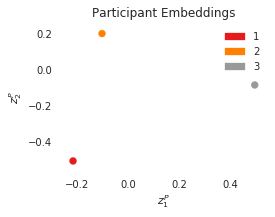

In [13]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


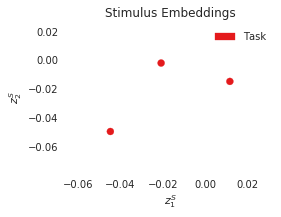

In [14]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

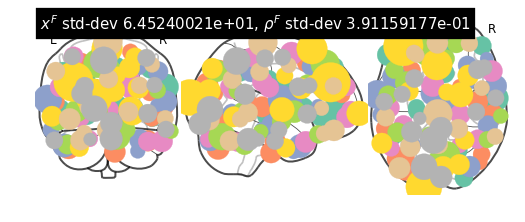

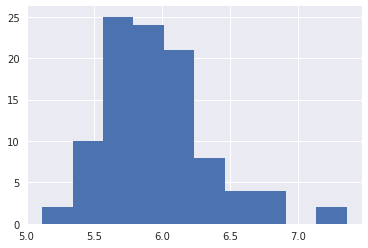

(<nilearn.plotting.displays.OrthoProjector at 0x7f0c8941a710>,
 tensor([[ -47.6663,  -49.7863,   40.2230],
         [   6.6477,   16.3245,    2.6712],
         [ -22.2375,  -23.0189,   -6.7436],
         [  22.0714,  -65.1854,   -6.8129],
         [  44.5457,  -55.5627,   42.3920],
         [ -49.1702,   15.2491,    2.1215],
         [  46.1339,   45.0947,   -8.1530],
         [ -52.5558,   35.5284,   -6.0965],
         [  27.1379,  -93.9829,    2.0886],
         [  60.0300,  -10.0933,   23.8704],
         [ -22.7729,  -20.0405,   32.9996],
         [   9.5388,   49.6623,    2.9278],
         [   8.7282,   48.7533,   45.7020],
         [   6.8642,  -17.8941,  -44.5428],
         [  23.2757,    1.6501,   60.6169],
         [ -41.8026,  -73.6533,  -39.9445],
         [  57.9259,  -27.3910,    3.4966],
         [ -33.8151,  -72.2347,   43.6300],
         [ -25.4485,   56.5155,   16.2856],
         [  43.4472,  -76.9914,   17.3886],
         [ -55.7073,  -42.1922,    8.0005],
         [ -3

In [15]:
dtfa.visualize_factor_embedding()

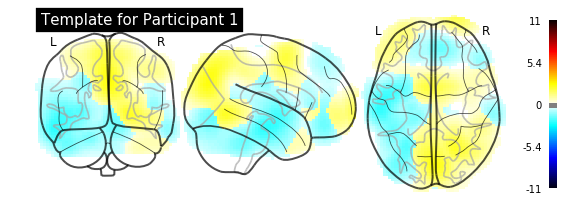

In [16]:
dtfa.plot_subject_template(1)

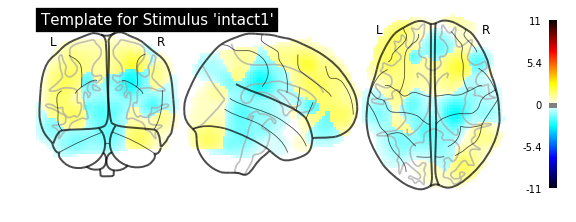

In [19]:
dtfa.plot_task_template('intact1')

In [20]:
dtfa.average_reconstruction_error()

11/16/2018 17:01:45 Average reconstruction error (MSE): 7.92953919e-01
11/16/2018 17:01:45 Average data norm (Euclidean): 9.92958209e-01
11/16/2018 17:01:45 Percent average reconstruction error: 0.271059


(0.7929539193190878, 0.992958209255918, 0.002710588825059887)